In [7]:
# %load std_ipython_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
pd.set_option('expand_frame_repr', True)

from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, precision_score
from sklearn.decomposition import PCA

from scipy import linalg

%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')

In [8]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True)

X = scale(df.ix[:,0:4].values)
y = df.ix[:,4].values

df.head()

   sepal_len  sepal_wid  petal_len  petal_wid        class
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa

In [9]:
e_val, e_vec = linalg.eig(np.cov(scale(X).T))
print(e_val)
print(e_vec)

[ 2.93035378+0.j  0.92740362+0.j  0.14834223+0.j  0.02074601+0.j]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [10]:
linalg.svd(scale(X).T)[0]

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

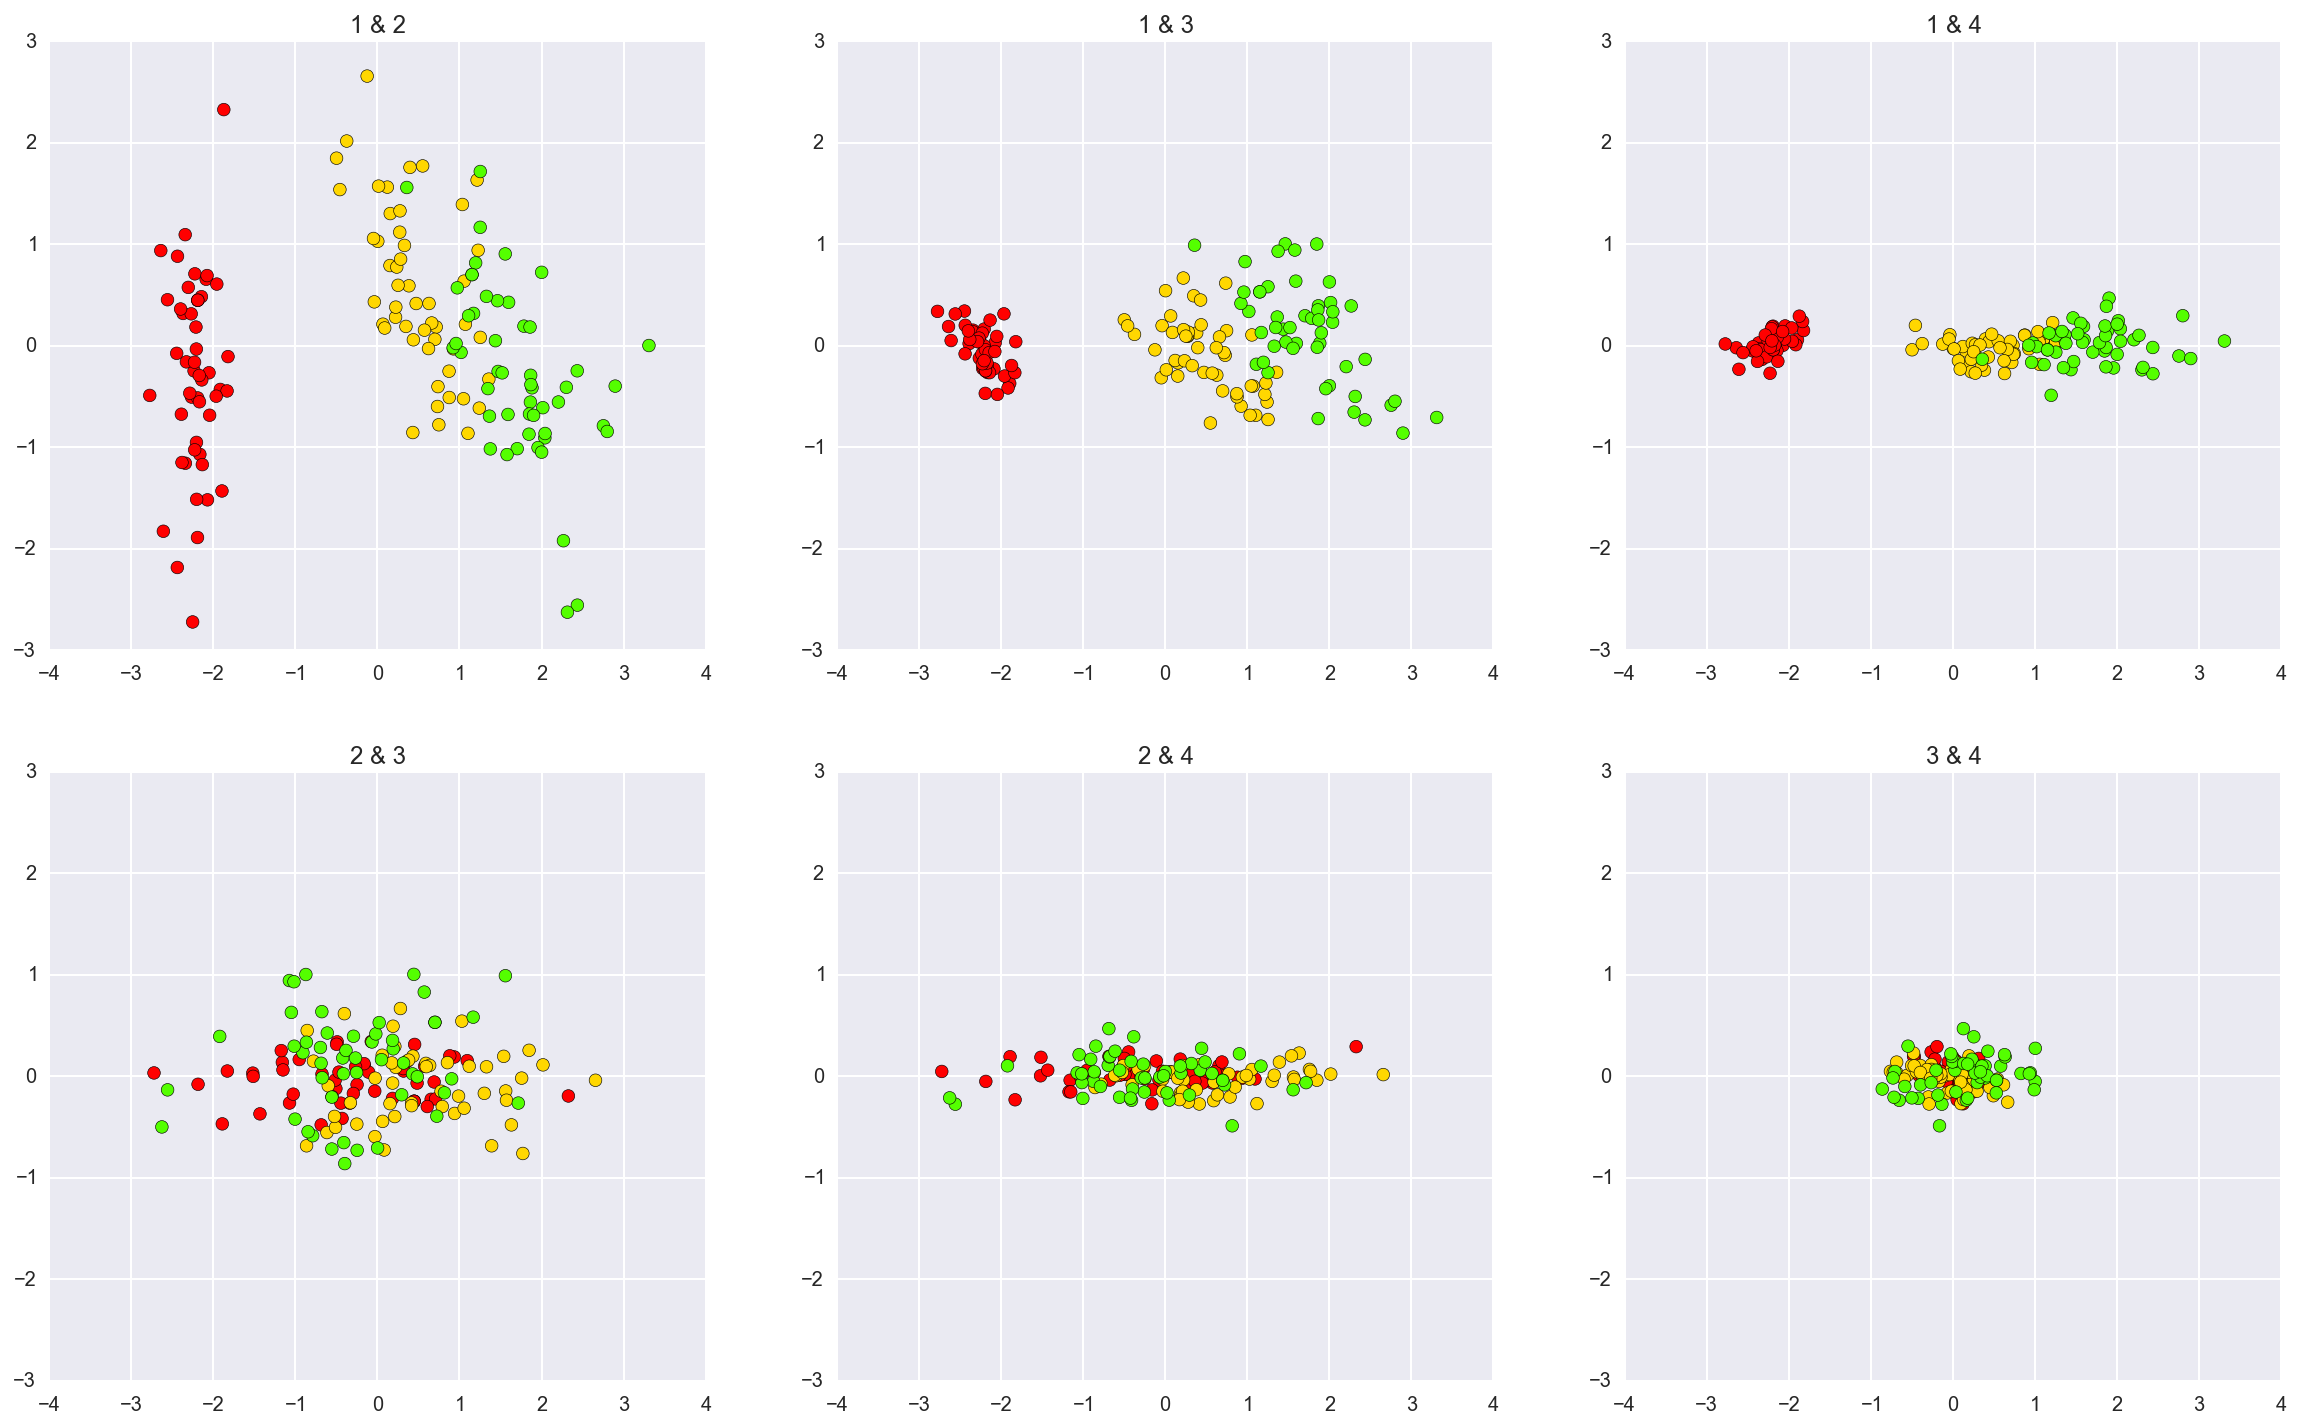

In [18]:
plot = scale(X).dot(e_vec)

colors = pd.factorize(y)[0]

fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2,3, figsize=(20,12))
ax1.scatter(plot[:,0], plot[:,1], c=colors, cmap=mpl.cm.prism, s=40)
ax2.scatter(plot[:,0], plot[:,2], c=colors, cmap=mpl.cm.prism, s=40)
ax3.scatter(plot[:,0], plot[:,3], c=colors, cmap=mpl.cm.prism, s=40)
ax4.scatter(plot[:,1], plot[:,2], c=colors, cmap=mpl.cm.prism, s=40)
ax5.scatter(plot[:,1], plot[:,3], c=colors, cmap=mpl.cm.prism, s=40)
ax6.scatter(plot[:,2], plot[:,3], c=colors, cmap=mpl.cm.prism, s=40)

ax1.set_title('1 & 2')
ax2.set_title('1 & 3')
ax3.set_title('1 & 4')
ax4.set_title('2 & 3')
ax5.set_title('2 & 4')
ax6.set_title('3 & 4')

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xlim(-4,4)
    ax.set_ylim(-3,3)